In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

test = np.array([-1,0,1])

print(sigmoid(test))

[0.26894142 0.5        0.73105858]


In [3]:
x_train=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
y_train=[0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]

x_test=[0,1,2,18,19]
y_test=[0,0,0,1,1]

x_train=np.array(x_train).reshape([-1,1])
y_train=np.array(y_train)

x_test=np.array(x_test).reshape([-1,1])
y_test=np.array(y_test)

print(x_train)
print(y_train)

[[ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


In [4]:
# 로지스틱 회귀 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression

In [5]:
# 로지스틱 회귀 생성하기
logi_reg=LogisticRegression()

In [6]:
# 학습하기
logi_reg.fit(x_train, y_train)

LogisticRegression()

In [7]:
# 역산을 위한 기울기와 절편이 있는지 확인하기
print('intercept:', logi_reg.intercept_)
print('coef:', logi_reg.coef_)

intercept: [-11.34126808]
coef: [[1.19383367]]


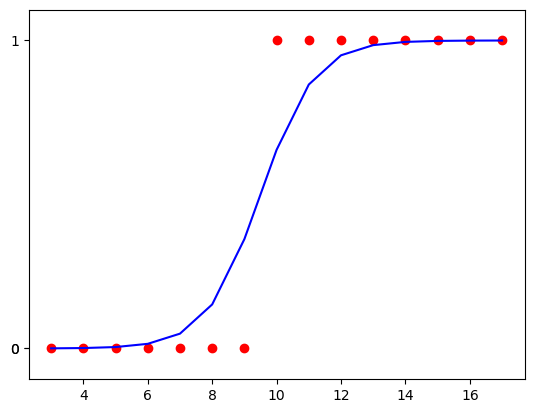

In [9]:
# 로지스틱 회귀 그래프 만들기
# 기울기와 절편을 수동으로 결과 만들기
odd = [] #
for i in x_train:
    odd.append((logi_reg.coef_*i)+logi_reg.intercept_)
    
sigmoid_y=sigmoid(np.array(odd))
sigmoid_y=sigmoid_y.reshape(-1,1)

# 역산된 그래프 표시하기
plt.scatter(x_train, y_train, color='red')
plt.plot(np.array(x_train), sigmoid_y, color='blue')
plt.rcParams['axes.grid'] = True
plt.yticks([0,0,5,1])
plt.ylim([-0.1,1.1]) # y축의 범위: [Ymin, Ymax]
plt.show()

In [10]:
# 전체 과정 요약
# 1. 모델 학습: 학습 데이터를 사용하여 로지스틱 회귀 모델을 학습시킵니다.
# 2. 결정 경계 계산: 학습된 모델의 기울기와 절편을 사용하여 각 학습 데이터 포인트에 대해 결정 경계(z값)를 계산합니다.
# 3. 확률값 계산: 시그모이드 함수를 사용하여 z값을 확률값으로 변환합니다.
# 4. 그래프 시각화: 학습 데이터와 모델의 예측 결과를 그래프에 시각화하여 모델의 성능을 확인합니다

In [11]:
# 로지스틱 회귀와 선형 회귀 비교하기
# 선형 회귀 모델링하기
# 선형 회귀 함수 불러오기
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x_train, y_train)

print('intercept:', lr.intercept_)
print('coef:', lr.coef_)

intercept: -0.4666666666666669
coef: [0.1]


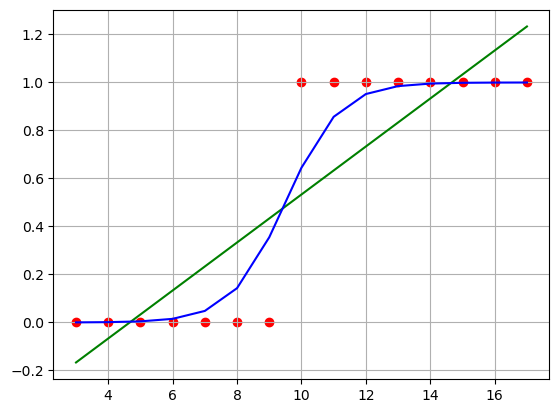

1.0
0.3981481481481476


In [13]:
# 선형 회귀 모델과 로지스틱 회귀 모델 비교하기
coef_intercept = x_train*lr.coef_ + lr.intercept_

plt.scatter(x_train, y_train, color='red')
plt.plot(np.array(x_train), coef_intercept, color='green')
plt.plot(np.array(x_train), sigmoid_y, color='blue')
plt.rcParams['axes.grid'] = True
plt.show()
print(logi_reg.score(x_test, y_test))
print(lr.score(x_test, y_test))

In [ ]:
# 로지스틱 회귀는 Y축의 임계값을 기준으로 이진/다중 분류에 강한 모델
# 선형 회귀는 직선으로만 참 거짓을 구분